some useful commands, for loadinf and transfering dataset:

In [0]:
! pwd
# ! ls ./data/CAT/
# ! wget  -P ./data  "https://storage.googleapis.com/kaggle-data-sets/13371/18106/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583154626&Signature=ki%2FEkWgeBWG0SQmkf5EhoZ2N%2BNwsq687TanAxfiRIzb4nFyJjrSnk94OYvQApexrJDJy2dv5GiiJU6Jd5DILjpl4LJPI9ssVx223h%2BkiDo5KrC%2FanebIZpt4NHtT43U2SFPYNF2sJMxuohXpOK%2Bu2vh8YZ10I7UhpBh5bquJgpzJzZueUwxmXIDvC9rorg%2BjZ4eWNoH1H6EacvvV14pIesfwbF%2BJjPJ0rBkLKqUP4bZlamy7qiOYXfIChDxcmJLI0O0D%2BrGRl6BA3KVVnx6sLP3Qx6B7Jr6ebAci%2Bp2WnknA5iyY40LEnckar%2FeSTcMs5wfawXANd%2FN%2BB5gppSjC9w%3D%3D&response-content-disposition=attachment%3B+filename%3Dcat-dataset.zip"
# rename .zip file
#! unzip ./data/archive.zip
#! mv ./data/CAT*/*.jpg ./data/cats

/content/drive/My Drive/my_git/GAN_pytorch_2


In [2]:
import torch , torch.nn as nn
import torch.nn.parallel
from torch.utils.data import DataLoader
from torchvision import datasets , transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
batchSize = 16
imageSize = 64

In [0]:
transform1 = transforms.Compose([transforms.Resize((imageSize,imageSize)), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
dataset = datasets.ImageFolder(root='./data', transform=transform1)

In [0]:
dataloader = DataLoader(dataset,batch_size = 16 , shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

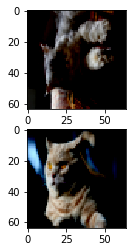

In [0]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(2)
axs[0].imshow(np.transpose(dataset[0][0].numpy(),(2,1,0)))
axs[1].imshow(np.transpose(dataset[4][0].numpy(),(1,2,0)))

In [0]:
def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0,0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0,0.02)
        m.bias.data.fill_(0)

In [0]:
class G(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias = False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias = False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias = False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias = False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias = False),
            nn.Tanh()
        )

    def forward(self,x):
        output = self.main(x)
        return output

In [0]:
class D(nn.Module):
    def __init__(self):
    super().__init__()
    self.main = nn.Sequential(
          nn.Conv2d(3, 64, 4, 2, 1, bias = False),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Conv2d(64, 128, 4, 2, 1, bias = False),
          nn.BatchNorm2d(128),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Conv2d(128, 256, 4, 2, 1, bias = False),
          nn.BatchNorm2d(256),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Conv2d(256, 512, 4, 2, 1, bias = False),
          nn.BatchNorm2d(512),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Conv2d(512, 1, 4, 1, 0, bias = False),
          nn.Sigmoid()
        )

    def forward(self,x):
    output = self.main(x)
    return output.view(-1)

In [0]:
model_gen = G()
model_gen.apply(weight_init)

model_dis = D()
model_dis.apply(weight_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [0]:
criterion = nn.BCELoss()
optimG = torch.optim.Adam(model_gen.parameters(), lr = 0.0002)
optimD = torch.optim.Adam(model_dis.parameters(), lr = 0.0002)
epochs = 10

In [1]:
model_dis.load_state_dict(torch.load('model_dis.pth'))
model_gen.load_state_dict(torch.load('model_gwn.pth'))
model_dis.eval()
model_gen.eval()

In [0]:
for epoch in range(epochs):
    for i, data in enumerate(dataloader, 0):      
        model_dis.zero_grad()
        real, _ = data
        input = real
        target = torch.ones(input.size()[0])
        output = model_dis(input)
        err_dis_real = criterion(output, target)

        noise = torch.randn(input.size()[0], 100, 1, 1)
        fake = model_gen(noise)
        target = torch.zeros(input.size()[0])
        output = model_dis(fake.detach())

        err_dis_fake = criterion(output , target)
        err_dis = err_dis_fake + err_dis_real
        err_dis.backward()
        optimD.step()


        model_gen.zero_grad()
        target = torch.ones(input.size()[0])
        output = model_dis(fake)
        err_gen = criterion(output , target)
        err_gen.backward()
        optimG.step()

        print(epoch , i)
        if i % 100 == 0 :
            vutils.save_image(real , f'real_image{i}.jpg',normalize=True)
            vutils.save_image(fake.data , f'fake_image{i}.jpg',normalize=True)

        

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [0]:
torch.save(model_dis.state_dict(), 'model_dis.pth')
torch.save(model_gen.state_dict(), 'model_gwn.pth')
model_dis.load_state_dict(torch.load('model_dis.pth'))
model_gen.load_state_dict(torch.load('model_gwn.pth'))
model_dis.eval()
model_gen.eval()

In [0]:
# Done!